#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
plt=reload(plt)
pd.options.mode.chained_assignment = None

* Plots Styling

In [118]:
ggplot_styles = {
    'axes.edgecolor': 'white','axes.facecolor': 'EBEBEB','axes.grid': True,'axes.grid.which': 'both','axes.spines.left': False,
    'axes.spines.right': False,'axes.spines.top': False,'axes.spines.bottom': False,'grid.color': 'white',
    'grid.linewidth': '1.2','xtick.color': '555555','xtick.major.bottom': True,'xtick.minor.bottom': False,
    'ytick.color': '555555','ytick.major.left': True,'ytick.minor.left': False,
}

#### Importing data

In [2]:
purchase=pd.read_csv("QVI_purchase_behaviour.csv")
transactions=pd.read_excel("QVI_transaction_data.xlsx")

#### Viewing the data

In [3]:
purchase.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [4]:
transactions.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


#### Data Exploration

In [5]:
purchase.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       2648

In [6]:
purchase.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [7]:
purchase.describe(include="O")

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


In [8]:
transactions.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [9]:
transactions.describe(include="O")

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


#### Data Wrangling

* Checking for missing values

In [10]:
purchase.isnull().value_counts()

LYLTY_CARD_NBR  LIFESTAGE  PREMIUM_CUSTOMER
False           False      False               72637
dtype: int64

In [11]:
transactions.isnull().value_counts()

DATE   STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  PROD_QTY  TOT_SALES
False  False      False           False   False     False      False     False        264836
dtype: int64

* Checking for outlires or anomalies

<AxesSubplot:>

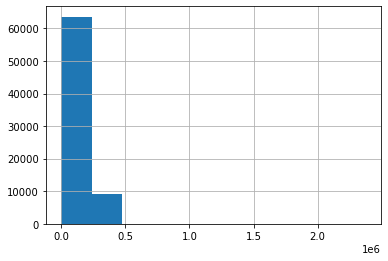

In [12]:
purchase["LYLTY_CARD_NBR"].hist()


In [13]:
purchase["LIFESTAGE"].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [14]:
purchase["PREMIUM_CUSTOMER"].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

<AxesSubplot:>

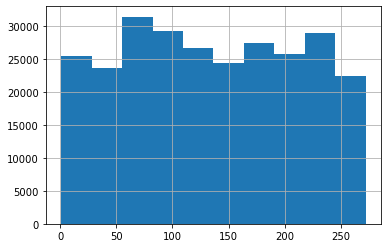

In [15]:
transactions["STORE_NBR"].hist()

<AxesSubplot:>

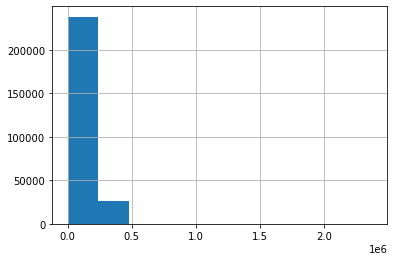

In [16]:
transactions["LYLTY_CARD_NBR"].hist()

<AxesSubplot:>

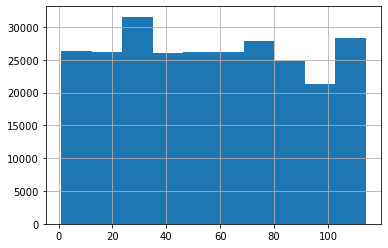

In [17]:
transactions["PROD_NBR"].hist()

In [18]:
transactions["PROD_NAME"].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [19]:
transactions["PROD_QTY"].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x29b6c88dfc0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b6c88e620>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b6c88dcf0>],
 'medians': [<matplotlib.lines.Line2D at 0x29b6c88eb00>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b6c88edd0>],
 'means': []}

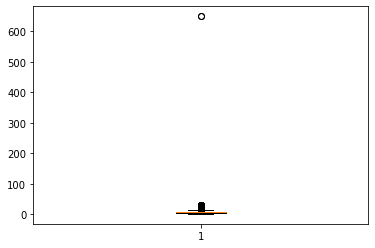

In [20]:
plt.boxplot(transactions["TOT_SALES"])

In [21]:
transactions[transactions["TOT_SALES"]>100]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


* Removing Outliers

In [22]:
transactions=transactions[transactions["PROD_QTY"]<200]
transactions["PROD_QTY"].value_counts()

2    236039
1     27518
5       450
3       430
4       397
Name: PROD_QTY, dtype: int64

* Merging Data

In [23]:
customers=pd.merge(purchase,transactions,on="LYLTY_CARD_NBR",how="inner")
customers.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8
6,1007,YOUNG SINGLES/COUPLES,Budget,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8
7,1007,YOUNG SINGLES/COUPLES,Budget,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7
8,1009,NEW FAMILIES,Premium,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7
9,1010,YOUNG SINGLES/COUPLES,Mainstream,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8


In [24]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   LIFESTAGE         264834 non-null  object        
 2   PREMIUM_CUSTOMER  264834 non-null  object        
 3   DATE              264834 non-null  datetime64[ns]
 4   STORE_NBR         264834 non-null  int64         
 5   TXN_ID            264834 non-null  int64         
 6   PROD_NBR          264834 non-null  int64         
 7   PROD_NAME         264834 non-null  object        
 8   PROD_QTY          264834 non-null  int64         
 9   TOT_SALES         264834 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


* Checking for duplicates

In [25]:
customers[customers.duplicated()==True]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
106249,107024,OLDER SINGLES/COUPLES,Premium,2018-10-01,107,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [26]:
customers=customers.drop_duplicates()

* Populating [PACKET_SIZE] column

In [27]:
customers["PACKET_SIZE"]=customers["PROD_NAME"].str[-4:-1]
customers

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160
...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210
264830,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150
264831,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165
264832,2370961,OLDER FAMILIES,Budget,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300


* Adjusting the date and populating a month and year column

In [28]:
customers["DATE"]=pd.to_datetime(customers["DATE"])
customers["YEAR"]=customers["DATE"].dt.year
customers["MONTH"]=customers["DATE"].dt.month
customers=customers.sort_values(by="DATE")
customers.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,YEAR,MONTH
65692,69194,RETIREES,Budget,2018-07-01,69,67067,85,RRD Honey Soy Chicken 165g,2,6.0,165,2018,7
248144,251207,MIDAGE SINGLES/COUPLES,Premium,2018-07-01,251,253270,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal,2018,7
16113,19205,OLDER SINGLES/COUPLES,Mainstream,2018-07-01,19,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,2018,7
107028,107162,OLDER SINGLES/COUPLES,Premium,2018-07-01,107,109257,15,Twisties Cheese 270g,2,9.2,270,2018,7
177030,179213,YOUNG SINGLES/COUPLES,Premium,2018-07-01,179,180682,32,Kettle Sea Salt And Vinegar 175g,2,10.8,175,2018,7


* Populating the brand column

In [29]:
customers[["BRAND","c44"]]=customers["PROD_NAME"].str.split(" ",1,expand=True)
customers=customers.drop(columns=["c44"])
customers.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,YEAR,MONTH,BRAND
65692,69194,RETIREES,Budget,2018-07-01,69,67067,85,RRD Honey Soy Chicken 165g,2,6.0,165,2018,7,RRD
248144,251207,MIDAGE SINGLES/COUPLES,Premium,2018-07-01,251,253270,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Sal,2018,7,Kettle
16113,19205,OLDER SINGLES/COUPLES,Mainstream,2018-07-01,19,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,2018,7,Pringles
107028,107162,OLDER SINGLES/COUPLES,Premium,2018-07-01,107,109257,15,Twisties Cheese 270g,2,9.2,270,2018,7,Twisties
177030,179213,YOUNG SINGLES/COUPLES,Premium,2018-07-01,179,180682,32,Kettle Sea Salt And Vinegar 175g,2,10.8,175,2018,7,Kettle


In [30]:
customers["BRAND"].value_counts()

Kettle        41288
Smiths        28859
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

* Writing the cleaned data into csv file

In [31]:
customers.to_csv("customers_data.csv")

#### Data Analysis 

* Grouping the stores by our metrics in order to select the trial stores and the control stores

In [32]:
customers=customers.sort_values(by="DATE")
stores=customers.groupby(["STORE_NBR","YEAR","MONTH",]).agg({"TOT_SALES":"sum","LYLTY_CARD_NBR":[lambda x: x.nunique(),
                         "count"]})
stores.columns
stores.columns=["TOTAL_SALES","NO.CUSTOMER","TRANSACTIONS"]
stores=stores.reset_index()
stores["Avg_Transaction_per_Customer"]=stores["TRANSACTIONS"]/stores["NO.CUSTOMER"]
stores=stores.sort_values(by=["STORE_NBR","YEAR"])
stores["Month-Year"]=stores["MONTH"].astype(str)+"-"+stores["YEAR"].astype(str)
stores.head(15)



,STORE_NBR,YEAR,MONTH,TOTAL_SALES,NO.CUSTOMER,TRANSACTIONS,Avg_Transaction_per_Customer,Month-Year
0,1,2018,7,206.9,49,52,1.061224,7-2018
1,1,2018,8,176.1,42,43,1.023810,8-2018
2,1,2018,9,278.8,59,62,1.050847,9-2018
3,1,2018,10,188.1,44,45,1.022727,10-2018
4,1,2018,11,192.6,46,47,1.021739,11-2018
5,1,2018,12,189.6,42,47,1.119048,12-2018
6,1,2019,1,154.8,35,36,1.028571,1-2019
7,1,2019,2,225.4,52,55,1.057692,2-2019
8,1,2019,3,192.9,45,49,1.088889,3-2019
9,1,2019,4,192.9,42,43,1.023810,4-2019


Text(0.5, 1.0, 'correlations heat map')

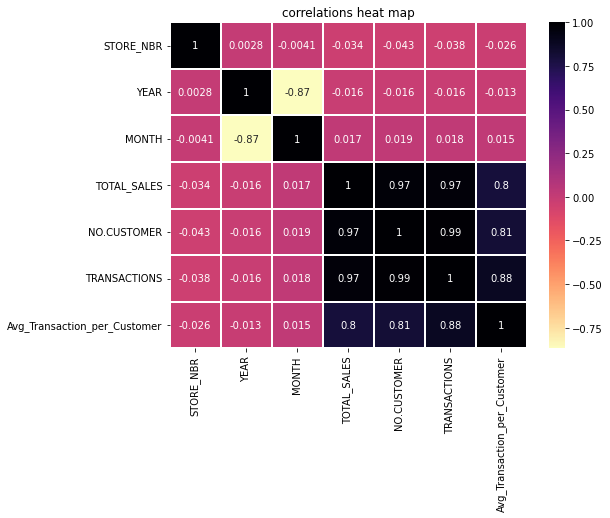

In [33]:
corr=stores.corr()
fig,ax=plt.subplots(figsize=(8,6))
heat_map=sns.heatmap(corr,annot=True,cmap='magma_r',linewidths=0.2)
plt.title("correlations heat map")

From the heat map we can notice that  ["TOTAL_SALES"], ["TRANSACTIONS"], ["NO.CUSTOMERS"] are highly correlated with a minimum correlation score of 0.97. So, we're gonna' consider only one feature of them as a representative for the three (Principle Component), and this feature is the ["TOTAL_SALES"] 

In [34]:
stores_reduced=stores.drop(columns=["TRANSACTIONS","NO.CUSTOMER"])
stores_reduced

,STORE_NBR,YEAR,MONTH,TOTAL_SALES,Avg_Transaction_per_Customer,Month-Year
0,1,2018,7,206.9,1.061224,7-2018
1,1,2018,8,176.1,1.023810,8-2018
2,1,2018,9,278.8,1.050847,9-2018
3,1,2018,10,188.1,1.022727,10-2018
4,1,2018,11,192.6,1.021739,11-2018
...,...,...,...,...,...,...
3164,272,2019,2,395.5,1.066667,2-2019
3165,272,2019,3,442.3,1.060000,3-2019
3166,272,2019,4,445.1,1.037037,4-2019
3167,272,2019,5,314.6,1.176471,5-2019


* Identifying the control stores based on the choosen metrics (The trial stores are: 77, 86, 88 )

1- Store 77

In [35]:
store_77=stores_reduced[stores_reduced["STORE_NBR"]==77]
store_77

,STORE_NBR,YEAR,MONTH,TOTAL_SALES,Avg_Transaction_per_Customer,Month-Year
880,77,2018,7,296.8,1.078431,7-2018
881,77,2018,8,255.5,1.021277,8-2018
882,77,2018,9,225.2,1.047619,9-2018
883,77,2018,10,204.5,1.027027,10-2018
884,77,2018,11,245.3,1.073171,11-2018
885,77,2018,12,267.3,1.065217,12-2018
886,77,2019,1,204.4,1.114286,1-2019
887,77,2019,2,235.0,1.000000,2-2019
888,77,2019,3,278.5,1.100000,3-2019
889,77,2019,4,263.5,1.021277,4-2019


In [61]:
same_average_stores = stores_reduced[(stores_reduced["TOTAL_SALES"].between(200,300 ))&
(stores_reduced["Avg_Transaction_per_Customer"].between(1.00,1.2))]
same_average_stores["STORE_NBR"].value_counts().head(10)

77     12
220    12
255    10
249    10
185    10
188    10
38     10
46     10
41      9
187     9
Name: STORE_NBR, dtype: int64

Based on the proximity in the metrics average we choose Stores [220,255,249,185,188,38] as potential acontrol stores for store 77

* Overall performance of the stores along the whole period

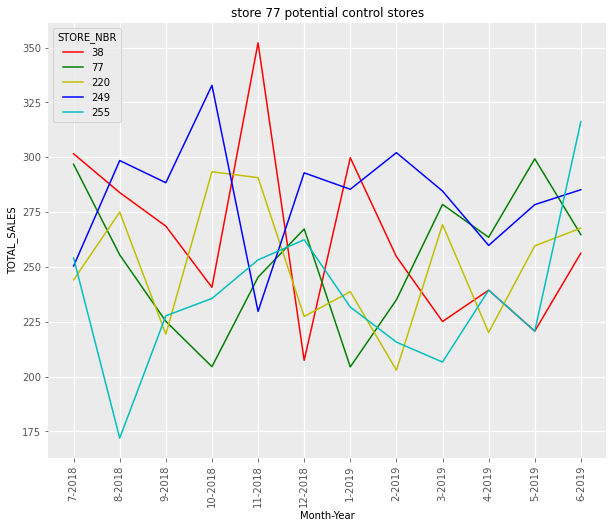

In [104]:
store_77_pot_ctr=stores_reduced.loc[stores_reduced["STORE_NBR"].isin([77,220,255,249,185.188,38])]
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="TOTAL_SALES",data=store_77_pot_ctr,hue="STORE_NBR",palette=['r', 'g','y','b','c'])
plt.xticks(rotation="vertical")
plt.title("store 77 potential control stores")
plt.rcParams.update(ggplot_styles)

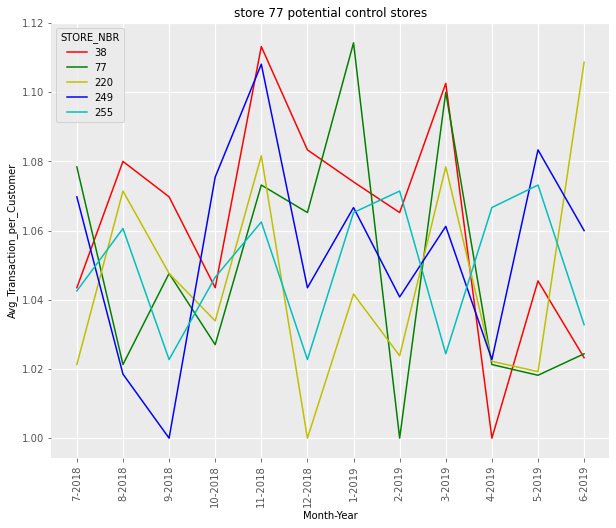

In [106]:
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="Avg_Transaction_per_Customer",data=store_77_pot_ctr,hue="STORE_NBR",palette=['r', 'g','y','b','c'])
plt.xticks(rotation="vertical")
plt.title("store 77 potential control stores")
plt.rcParams.update(ggplot_styles)

##### Based on the previous comparisons we will choose Store 220 as the control store for store 77

In [62]:
store_220=stores_reduced[stores_reduced["STORE_NBR"]==220]
store_220

,STORE_NBR,YEAR,MONTH,TOTAL_SALES,Avg_Transaction_per_Customer,Month-Year
2543,220,2018,7,244.1,1.021277,7-2018
2544,220,2018,8,275.0,1.071429,8-2018
2545,220,2018,9,219.3,1.047619,9-2018
2546,220,2018,10,293.4,1.033898,10-2018
2547,220,2018,11,290.7,1.081633,11-2018
2548,220,2018,12,227.4,1.000000,12-2018
2549,220,2019,1,238.7,1.041667,1-2019
2550,220,2019,2,202.9,1.023810,2-2019
2551,220,2019,3,269.3,1.078431,3-2019
2552,220,2019,4,220.1,1.022222,4-2019


* Comparing the performance of the trial store 77 with the control store 220 over the trial period from Feb-2019 
  to Apr-2019

In [56]:
store_77_trial_result=stores_reduced.loc[(stores_reduced["STORE_NBR"].isin([77,220]))&(stores_reduced["YEAR"]==2019)
                                         &(stores_reduced["MONTH"].between(2,4))]
store_77_trial_result

,STORE_NBR,YEAR,MONTH,TOTAL_SALES,Avg_Transaction_per_Customer,Month-Year
887,77,2019,2,235.0,1.000000,2-2019
888,77,2019,3,278.5,1.100000,3-2019
889,77,2019,4,263.5,1.021277,4-2019
2550,220,2019,2,202.9,1.023810,2-2019
2551,220,2019,3,269.3,1.078431,3-2019
2552,220,2019,4,220.1,1.022222,4-2019


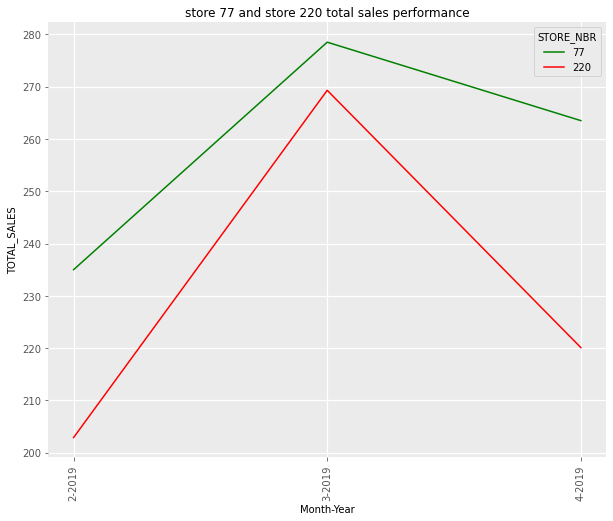

In [107]:
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="TOTAL_SALES",data=store_77_trial_result,hue="STORE_NBR",palette=['g','r'])
plt.xticks(rotation="vertical")
plt.title("store 77 and store 220 total sales performance")
plt.rcParams.update(ggplot_styles)

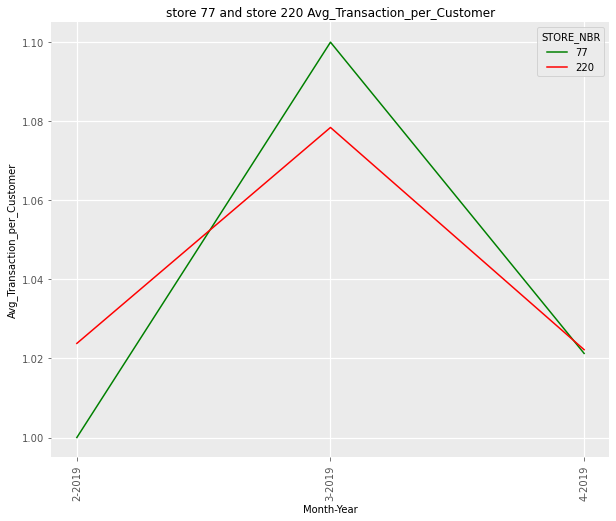

In [108]:
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="Avg_Transaction_per_Customer",data=store_77_trial_result,hue="STORE_NBR",palette=['g','r'])
plt.xticks(rotation="vertical")
plt.title("store 77 and store 220 Avg_Transaction_per_Customer")
plt.rcParams.update(ggplot_styles)

2- Store 86

In [60]:
store_86=stores_reduced[stores_reduced["STORE_NBR"]==86]
store_86

,STORE_NBR,YEAR,MONTH,TOTAL_SALES,Avg_Transaction_per_Customer,Month-Year
977,86,2018,7,892.20,1.272727,7-2018
978,86,2018,8,764.05,1.191489,8-2018
979,86,2018,9,914.60,1.252427,9-2018
980,86,2018,10,948.40,1.266055,10-2018
981,86,2018,11,918.00,1.270000,11-2018
982,86,2018,12,841.20,1.224490,12-2018
983,86,2019,1,841.40,1.382979,1-2019
984,86,2019,2,913.20,1.299065,2-2019
985,86,2019,3,1026.80,1.234783,3-2019
986,86,2019,4,848.20,1.209524,4-2019


In [73]:
same_average_stores_86 = stores_reduced[(stores_reduced["TOTAL_SALES"].between(750,1050))&
(stores_reduced["Avg_Transaction_per_Customer"].between(1.18,1.39))]
same_average_stores_86["STORE_NBR"].value_counts().head(10)

247    12
229    12
83     12
86     12
97     12
30     12
227    12
225    12
207    12
112    12
Name: STORE_NBR, dtype: int64

Based on the proximity in the metrics average we choose Stores [30,83,97,112,207,225,227,229,247] as potential acontrol stores for store 86

* Overall performance of the stores along the whole period

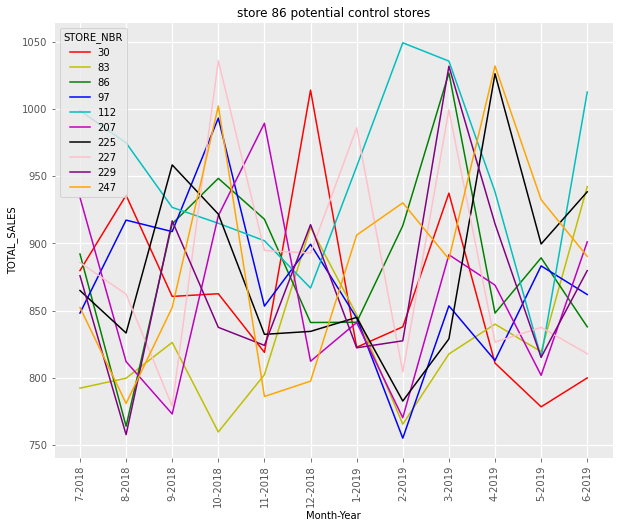

In [109]:
store_86_pot_ctr=stores_reduced.loc[stores_reduced["STORE_NBR"].isin([30,83,86,97,112,207,225,227,229,247])]
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="TOTAL_SALES",data=store_86_pot_ctr,hue="STORE_NBR",palette=['r', 'y','g','b','c','m','k','pink','purple','orange'])
plt.xticks(rotation="vertical")
plt.title("store 86 potential control stores")
plt.rcParams.update(ggplot_styles)

* Narrowing it down to stores: 207,227

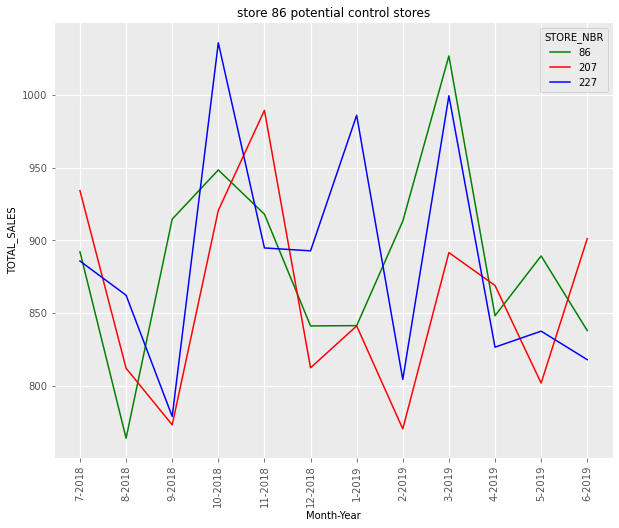

In [110]:
store_86_pot_ctr=stores_reduced.loc[stores_reduced["STORE_NBR"].isin([86,207,227])]
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="TOTAL_SALES",data=store_86_pot_ctr,hue="STORE_NBR",palette=['g', 'r','b'])
plt.xticks(rotation="vertical")
plt.title("store 86 potential control stores")
plt.rcParams.update(ggplot_styles)

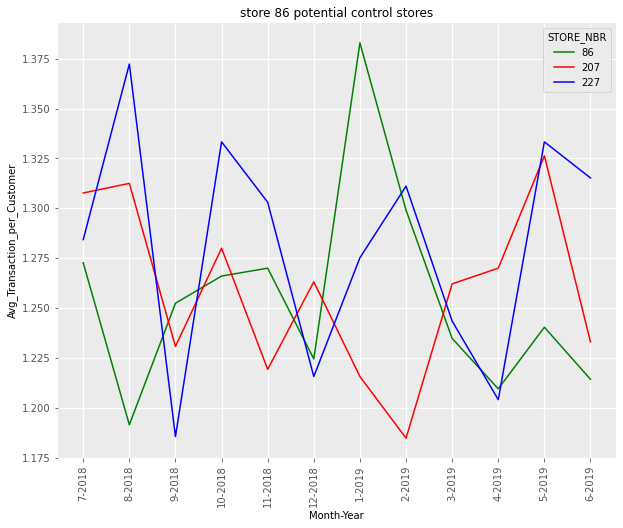

In [111]:
store_86_pot_ctr=stores_reduced.loc[stores_reduced["STORE_NBR"].isin([86,207,227])]
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="Avg_Transaction_per_Customer",data=store_86_pot_ctr,hue="STORE_NBR",palette=['g', 'r','b'])
plt.xticks(rotation="vertical")
plt.title("store 86 potential control stores")
plt.rcParams.update(ggplot_styles)

##### Based on the previous comparisons we will choose Store 227 as the control store for store 86

In [86]:
store_227=stores_reduced[stores_reduced["STORE_NBR"]==227]
store_227

,STORE_NBR,YEAR,MONTH,TOTAL_SALES,Avg_Transaction_per_Customer,Month-Year
2627,227,2018,7,885.8,1.284314,7-2018
2628,227,2018,8,862.3,1.372340,8-2018
2629,227,2018,9,779.0,1.185567,9-2018
2630,227,2018,10,1035.8,1.333333,10-2018
2631,227,2018,11,894.8,1.303030,11-2018
2632,227,2018,12,892.8,1.215686,12-2018
2633,227,2019,1,986.0,1.275229,1-2019
2634,227,2019,2,804.4,1.311111,2-2019
2635,227,2019,3,999.4,1.243478,3-2019
2636,227,2019,4,826.6,1.204082,4-2019


* Comparing the performance of the trial store 86 with the control store 227 over the trial period from Feb-2019 
  to Apr-2019

In [87]:
store_86_trial_result=stores_reduced.loc[(stores_reduced["STORE_NBR"].isin([86,227]))&(stores_reduced["YEAR"]==2019)
                                         &(stores_reduced["MONTH"].between(2,4))]
store_86_trial_result

,STORE_NBR,YEAR,MONTH,TOTAL_SALES,Avg_Transaction_per_Customer,Month-Year
984,86,2019,2,913.2,1.299065,2-2019
985,86,2019,3,1026.8,1.234783,3-2019
986,86,2019,4,848.2,1.209524,4-2019
2634,227,2019,2,804.4,1.311111,2-2019
2635,227,2019,3,999.4,1.243478,3-2019
2636,227,2019,4,826.6,1.204082,4-2019


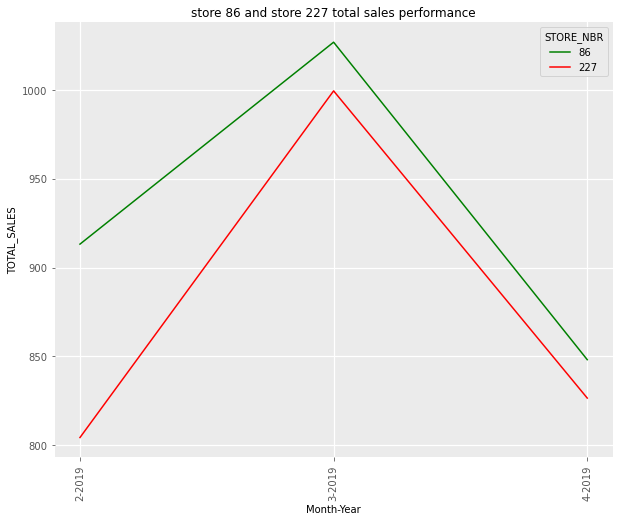

In [112]:
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="TOTAL_SALES",data=store_86_trial_result,hue="STORE_NBR",palette=['g','r'])
plt.xticks(rotation="vertical")
plt.title("store 86 and store 227 total sales performance")
plt.rcParams.update(ggplot_styles)

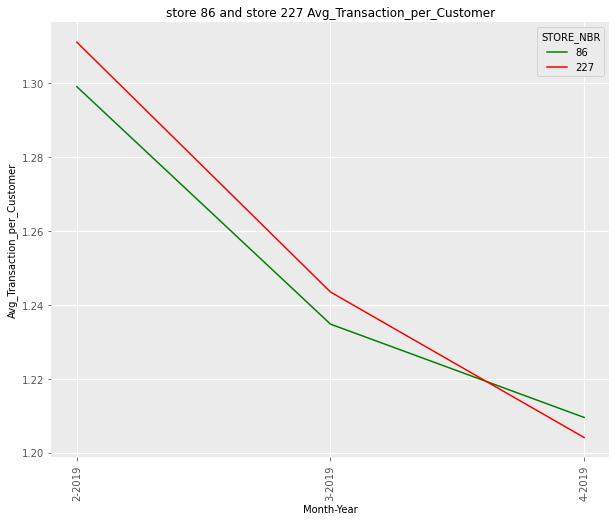

In [113]:
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="Avg_Transaction_per_Customer",data=store_86_trial_result,hue="STORE_NBR",palette=['g','r'])
plt.xticks(rotation="vertical")
plt.title("store 86 and store 227 Avg_Transaction_per_Customer")
plt.rcParams.update(ggplot_styles)

3- Store 88

In [90]:
store_88=stores_reduced[stores_reduced["STORE_NBR"]==88]
store_88

,STORE_NBR,YEAR,MONTH,TOTAL_SALES,Avg_Transaction_per_Customer,Month-Year
1001,88,2018,7,1310.00,1.186047,7-2018
1002,88,2018,8,1323.80,1.221374,8-2018
1003,88,2018,9,1423.00,1.282258,9-2018
1004,88,2018,10,1352.40,1.284553,10-2018
1005,88,2018,11,1382.80,1.207692,11-2018
1006,88,2018,12,1325.20,1.182540,12-2018
1007,88,2019,1,1266.40,1.247863,1-2019
1008,88,2019,2,1370.20,1.241935,2-2019
1009,88,2019,3,1477.20,1.268657,3-2019
1010,88,2019,4,1439.40,1.265625,4-2019


In [96]:
same_average_stores_88 = stores_reduced[(stores_reduced["TOTAL_SALES"].between(1200,1500))&
(stores_reduced["Avg_Transaction_per_Customer"].between(1.15,1.3))]
same_average_stores_88["STORE_NBR"].value_counts().head(12)

88     12
165    12
237     9
40      8
181     6
203     6
199     6
226     6
4       5
81      5
130     5
58      5
Name: STORE_NBR, dtype: int64

Based on the proximity in the metrics average we choose Stores [40,165,237] as potential acontrol stores for store 88

* Overall performance of the stores along the whole period

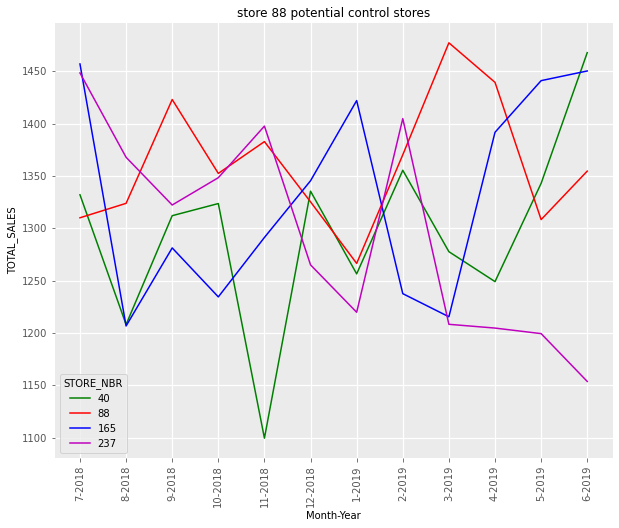

In [114]:
store_88_pot_ctr=stores_reduced.loc[stores_reduced["STORE_NBR"].isin([40,88,165,237])]
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="TOTAL_SALES",data=store_88_pot_ctr,hue="STORE_NBR",palette=['g', 'r','b','m'])
plt.xticks(rotation="vertical")
plt.title("store 88 potential control stores")
plt.rcParams.update(ggplot_styles)

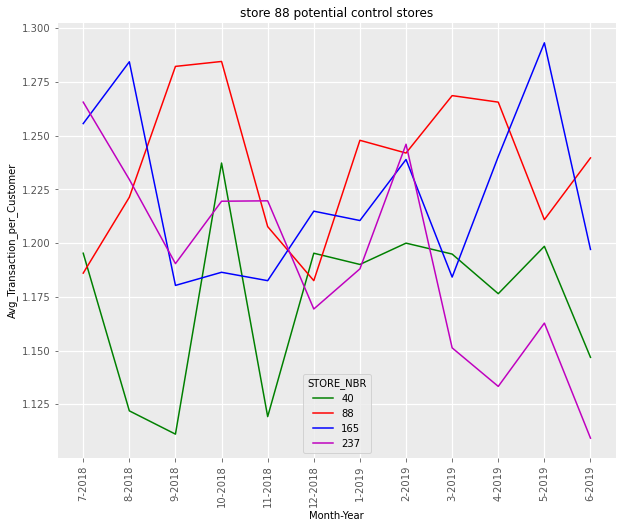

In [115]:
store_88_pot_ctr=stores_reduced.loc[stores_reduced["STORE_NBR"].isin([40,88,165,237])]
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="Avg_Transaction_per_Customer",data=store_88_pot_ctr,hue="STORE_NBR",palette=['g', 'r','b','m'])
plt.xticks(rotation="vertical")
plt.title("store 88 potential control stores")
plt.rcParams.update(ggplot_styles)

##### Based on the previous comparisons we will choose Store 165 as the control store for store 88

* Comparing the performance of the trial store 88 with the control store 165 over the trial period from Feb-2019 
  to Apr-2019

In [100]:
store_88_trial_result=stores_reduced.loc[(stores_reduced["STORE_NBR"].isin([88,165]))&(stores_reduced["YEAR"]==2019)
                                         &(stores_reduced["MONTH"].between(2,4))]
store_88_trial_result

,STORE_NBR,YEAR,MONTH,TOTAL_SALES,Avg_Transaction_per_Customer,Month-Year
1008,88,2019,2,1370.2,1.241935,2-2019
1009,88,2019,3,1477.2,1.268657,3-2019
1010,88,2019,4,1439.4,1.265625,4-2019
1920,165,2019,2,1237.5,1.238938,2-2019
1921,165,2019,3,1215.4,1.184211,3-2019
1922,165,2019,4,1391.7,1.240310,4-2019


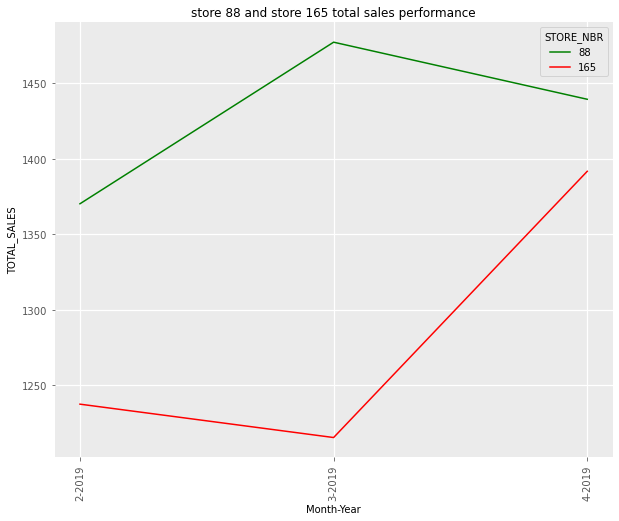

In [116]:
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="TOTAL_SALES",data=store_88_trial_result,hue="STORE_NBR",palette=['g','r'])
plt.xticks(rotation="vertical")
plt.title("store 88 and store 165 total sales performance")
plt.rcParams.update(ggplot_styles)

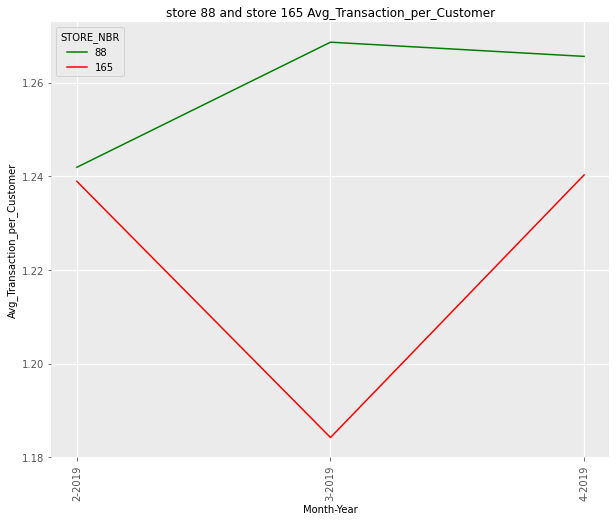

In [117]:
fig,ax=plt.subplots(figsize=(10,8))
points=sns.lineplot(x="Month-Year",y="Avg_Transaction_per_Customer",data=store_88_trial_result,hue="STORE_NBR",palette=['g','r'])
plt.xticks(rotation="vertical")
plt.title("store 88 and store 165 Avg_Transaction_per_Customer")
plt.rcParams.update(ggplot_styles)